### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Approach:<br>
Data Handling and Cleaning<br>
No missing values or incorrect data types before we proceed to the analysis stage<br>-
-- Imputing Missing Values<br>
Sanity Checks<br>
Derived Column<br>
Outliers Removal<br>
Inspecting Correlation<br>
Analyzing Categorical Features<br>
Encoding Categorical Features<br>
Data Visualization<br>
Splitting data into Train and Test data<br>
Transformation of Target Variable<br>
Feature Scaling<br>
Primary Feature Selection using RFE<br>
Ridge Regression<br>
Lasso Regression<br>
Comparing model coefficients<br>
Model Evaluation<br>
Choosing the final model and most significant features.<br>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as  plt

#import train_test_split to split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# float 2 digit decimal
pd.options.display.float_format = '{:.2f}'.format

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# setting max no of rows to print as 100
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
#read the csv
hou_df = pd.read_csv("train.csv")

In [4]:
hou_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hou_df.shape

(1460, 81)

In [6]:
hou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Handling and Cleaning
No __missing values__ or __incorrect data types__ before we proceed to the analysis stage

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column

#### Missing value treatment

In [7]:
# Identifying null columns
hou_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

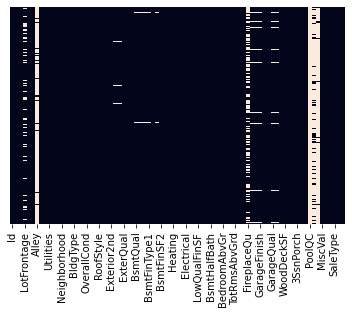

In [8]:
sns.heatmap(hou_df.isnull(), yticklabels=False, cbar=False)

In [9]:
# Find percentage of missing values. If it is more than 75%, better to remove those columns
percent_missing = round(hou_df.isnull().sum() * 100 / len(hou_df), 2)
missing_value_df = pd.DataFrame({'column_name': hou_df.columns,
                                 'percent_missing': percent_missing})



In [10]:
missing_value_df.sort_values(by=['percent_missing'], ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.52
MiscFeature,MiscFeature,96.30
Alley,Alley,93.77
Fence,Fence,80.75
FireplaceQu,FireplaceQu,47.26
LotFrontage,LotFrontage,17.74
GarageYrBlt,GarageYrBlt,5.55
GarageCond,GarageCond,5.55
GarageType,GarageType,5.55
GarageFinish,GarageFinish,5.55


In [11]:
#Dropping columns MiscFeature as missing values are more than 80%. Other NA is actually not applicable. feature is not avaialbe. So it is valid.PoolQC, Alley, fireplaceQU
hou_df.drop(['MiscFeature'], axis=1, inplace=True)



In [12]:
# Identify categorical variables and analyse manually 
for col in hou_df:
    print(hou_df[col].value_counts())

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.00     143
70.00      70
80.00      69
50.00      57
75.00      53
         ... 
137.00      1
141.00      1
38.00       1
140.00      1
46.00       1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
L

Name: YrSold, dtype: int64
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64


In [13]:
#categroical values are 'MSZoning','Street','Alley', 'PoolQC', "Fence" ,'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath',  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',  'GarageCars', 'GarageQual', 'GarageCond',  'PavedDrive', 'SaleType', 'SaleCondition'
hou_cat_manual = ['MSZoning','Street','Alley', 'PoolQC', "OverallCond", "Fence" ,'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath',  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',  'GarageCars', 'GarageQual', 'GarageCond',  'PavedDrive', 'SaleType', 'SaleCondition']
hou_cat_manual

['MSZoning',
 'Street',
 'Alley',
 'PoolQC',
 'OverallCond',
 'Fence',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtHalfBath',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [14]:
#Detect missing values and replace it NOT_APPLICABLE as data dictionary indicates absense of facility which affect the price if we do mode.
hou_df['Alley'].fillna("No_Alley", inplace=True)
hou_df['BsmtQual'].fillna("No_BsmtQual", inplace=True)
hou_df['BsmtCond'].fillna("No_BsmtCond", inplace=True) 
hou_df['BsmtExposure'].fillna("No_BsmtExposure", inplace=True)
hou_df['BsmtFinType1'].fillna("No_BsmtFinType1", inplace=True)
hou_df['BsmtFinType2'].fillna("No_BsmtFinType2", inplace=True)
hou_df['FireplaceQu'].fillna("No_FireplaceQu", inplace=True)
hou_df['GarageType'].fillna("No_GarageType", inplace=True)
hou_df['GarageQual'].fillna("No_GarageQual", inplace=True)
hou_df['GarageFinish'].fillna("No_GarageFinish", inplace=True)
hou_df['GarageCond'].fillna("No_GarageCond", inplace=True)
hou_df['GarageType'].fillna("No_GarageType", inplace=True)
hou_df['Fence'].fillna("No_Fence", inplace=True)
hou_df['PoolQC'].fillna("No_PoolQC", inplace=True)




In [15]:
hou_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [16]:
# just 1 NA for electrical. Fill it with mode.
hou_df['Electrical'] = hou_df['Electrical'].fillna(hou_df['Electrical'].mode()[0])
hou_df['MasVnrType'] = hou_df['MasVnrType'].fillna(hou_df['MasVnrType'].mode()[0])


In [17]:
## Below attributes are numrical. However considering this as categrorical as per data dictionary
cat_in_numeric = ['OverallQual','BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath',  'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars' ]

In [18]:
hou_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [19]:
# Fill LotFrontage  with median value
hou_df['LotFrontage'] = hou_df['LotFrontage'].fillna(float(hou_df['LotFrontage'].median()))
# Fill MasVNRArea  with median value.
hou_df['MasVnrArea'] = hou_df['MasVnrArea'].fillna(float(hou_df['MasVnrArea'].median()))
hou_df['GarageYrBlt'] = hou_df['GarageYrBlt'].fillna(float(hou_df['GarageYrBlt'].median()))
#Dropping ID columns
hou_df.drop(['Id'], axis=1, inplace=True)

In [20]:
hou_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

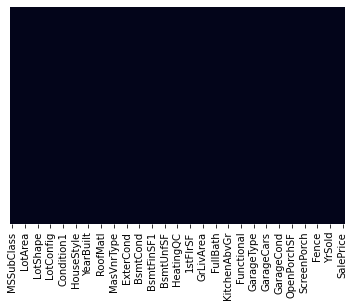

In [21]:
sns.heatmap(hou_df.isnull(), yticklabels=False, cbar=False)

In [22]:
hou_df.shape

(1460, 79)

In [23]:
hou_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,69.86,10516.83,6.10,5.58,1971.27,1984.87,103.12,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.59,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.30,22.03,9981.26,1.38,1.11,30.20,20.65,180.73,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.00,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,60.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1962.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.00,79.00,11601.50,7.00,6.00,2000.00,2004.00,164.25,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


##### 75% is zero for BsmtFinSF2, LowQualFinSF, EnclosedPorch,3SsnPorch, ScreenPorch, PoolArea, MiscVal. will look later.

## Analysing Numerical data and Categorical data

In [24]:
numeric_df = hou_df.select_dtypes(include=['int64','float64'])
category_df = hou_df.select_dtypes(include=['object'])


In [25]:
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
category_df.columns



Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [27]:
### Analysing Numerical data 
numeric_df.describe(percentiles=[0.05, 0.10, .25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,69.86,10516.83,6.10,5.58,1971.27,1984.87,103.12,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.59,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.30,22.03,9981.26,1.38,1.11,30.20,20.65,180.73,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.00,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
5%,20.00,35.95,3311.70,4.00,4.00,1916.00,1950.00,0.00,0.00,0.00,0.00,519.30,672.95,0.00,0.00,848.00,0.00,0.00,1.00,0.00,2.00,1.00,4.00,0.00,1930.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2006.00,88000.00
10%,20.00,49.00,5000.00,5.00,5.00,1924.90,1950.00,0.00,0.00,0.00,74.90,636.90,756.90,0.00,0.00,912.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1948.00,1.00,240.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2006.00,106475.00
25%,20.00,60.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1962.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.00,79.00,11601.50,7.00,6.00,2000.00,2004.00,164.25,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
90%,120.00,92.00,14381.70,8.00,7.00,2006.00,2006.00,335.00,1065.50,117.20,1232.00,1602.20,1680.00,954.20,0.00,2158.30,1.00,0.00,2.00,1.00,4.00,1.00,9.00,1.00,2006.00,3.00,757.10,262.00,130.00,112.00,0.00,0.00,0.00,0.00,10.00,2010.00,278000.00


MSSubClass


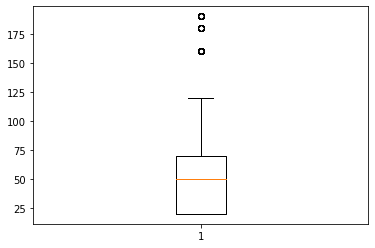

0.10    20.00
0.50    50.00
0.75    70.00
0.90   120.00
0.95   160.00
0.97   160.00
0.98   188.20
0.99   190.00
1.00   190.00
Name: MSSubClass, dtype: float64
LotFrontage


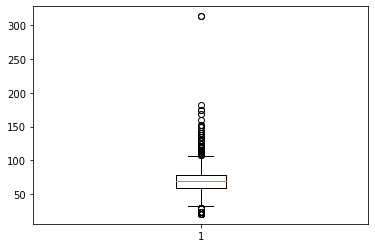

0.10    49.00
0.50    69.00
0.75    79.00
0.90    92.00
0.95   104.00
0.97   114.00
0.98   120.82
0.99   137.41
1.00   313.00
Name: LotFrontage, dtype: float64
LotArea


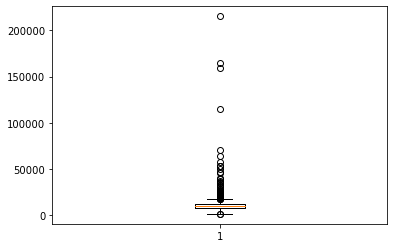

0.10     5000.00
0.50     9478.50
0.75    11601.50
0.90    14381.70
0.95    17401.15
0.97    21571.80
0.98    25251.62
0.99    37567.64
1.00   215245.00
Name: LotArea, dtype: float64
OverallQual


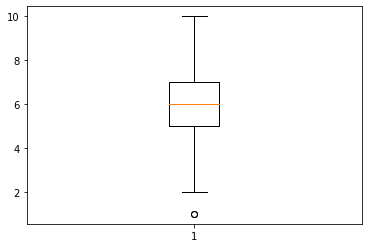

0.10    5.00
0.50    6.00
0.75    7.00
0.90    8.00
0.95    8.00
0.97    9.00
0.98    9.00
0.99   10.00
1.00   10.00
Name: OverallQual, dtype: float64
OverallCond


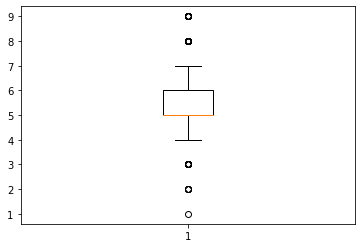

0.10   5.00
0.50   5.00
0.75   6.00
0.90   7.00
0.95   8.00
0.97   8.00
0.98   8.00
0.99   9.00
1.00   9.00
Name: OverallCond, dtype: float64
YearBuilt


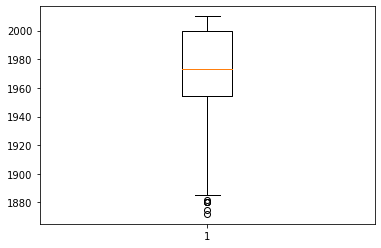

0.10   1924.90
0.50   1973.00
0.75   2000.00
0.90   2006.00
0.95   2007.00
0.97   2007.00
0.98   2008.00
0.99   2009.00
1.00   2010.00
Name: YearBuilt, dtype: float64
YearRemodAdd


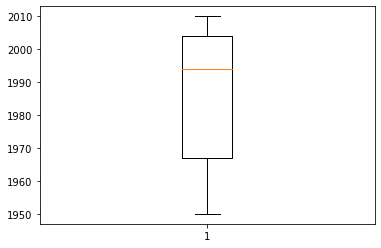

0.10   1950.00
0.50   1994.00
0.75   2004.00
0.90   2006.00
0.95   2007.00
0.97   2008.00
0.98   2008.00
0.99   2009.00
1.00   2010.00
Name: YearRemodAdd, dtype: float64
MasVnrArea


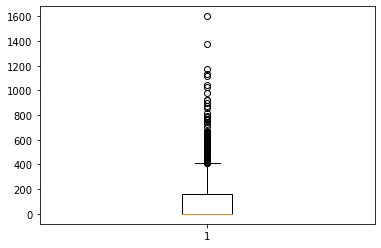

0.10      0.00
0.50      0.00
0.75    164.25
0.90    335.00
0.95    456.00
0.97    573.69
0.98    650.82
0.99    791.28
1.00   1600.00
Name: MasVnrArea, dtype: float64
BsmtFinSF1


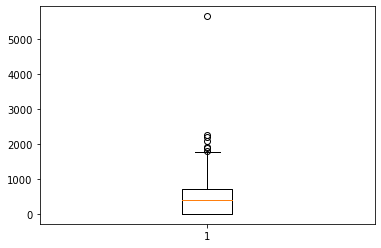

0.10      0.00
0.50    383.50
0.75    712.25
0.90   1065.50
0.95   1274.00
0.97   1375.99
0.98   1442.64
0.99   1572.41
1.00   5644.00
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2


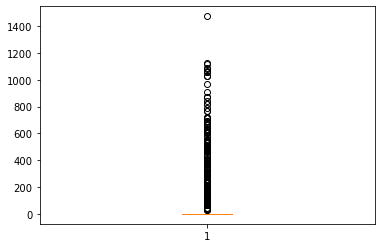

0.10      0.00
0.50      0.00
0.75      0.00
0.90    117.20
0.95    396.20
0.97    546.23
0.98    658.12
0.99    830.38
1.00   1474.00
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF


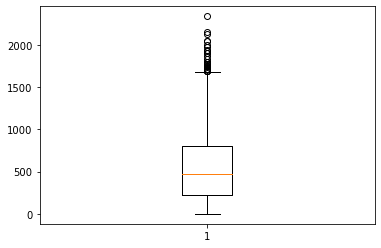

0.10     74.90
0.50    477.50
0.75    808.00
0.90   1232.00
0.95   1468.00
0.97   1589.38
0.98   1678.20
0.99   1797.05
1.00   2336.00
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF


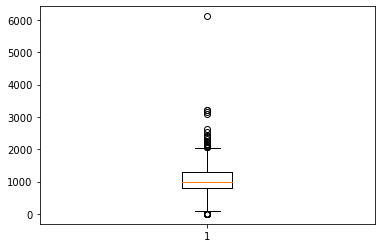

0.10    636.90
0.50    991.50
0.75   1298.25
0.90   1602.20
0.95   1753.00
0.97   1905.46
0.98   2001.64
0.99   2155.05
1.00   6110.00
Name: TotalBsmtSF, dtype: float64
1stFlrSF


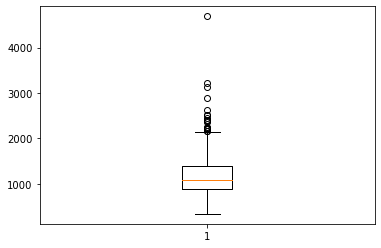

0.10    756.90
0.50   1087.00
0.75   1391.25
0.90   1680.00
0.95   1831.25
0.97   1981.61
0.98   2072.28
0.99   2219.46
1.00   4692.00
Name: 1stFlrSF, dtype: float64
2ndFlrSF


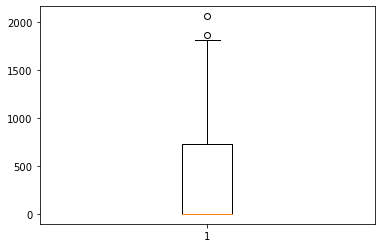

0.10      0.00
0.50      0.00
0.75    728.00
0.90    954.20
0.95   1141.05
0.97   1245.53
0.98   1318.56
0.99   1418.92
1.00   2065.00
Name: 2ndFlrSF, dtype: float64
LowQualFinSF


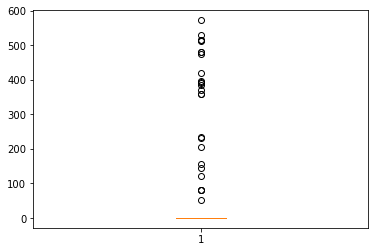

0.10     0.00
0.50     0.00
0.75     0.00
0.90     0.00
0.95     0.00
0.97     0.00
0.98     0.00
0.99   360.00
1.00   572.00
Name: LowQualFinSF, dtype: float64
GrLivArea


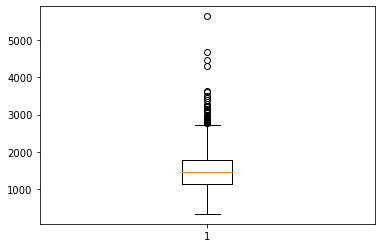

0.10    912.00
0.50   1464.00
0.75   1776.75
0.90   2158.30
0.95   2466.10
0.97   2633.23
0.98   2782.38
0.99   3123.48
1.00   5642.00
Name: GrLivArea, dtype: float64
BsmtFullBath


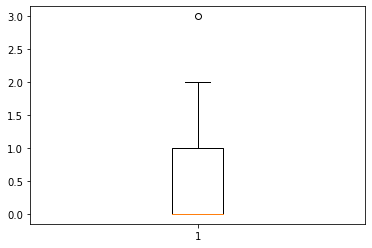

0.10   0.00
0.50   0.00
0.75   1.00
0.90   1.00
0.95   1.00
0.97   1.00
0.98   1.00
0.99   2.00
1.00   3.00
Name: BsmtFullBath, dtype: float64
BsmtHalfBath


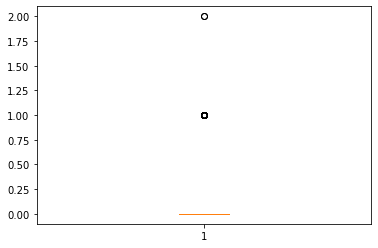

0.10   0.00
0.50   0.00
0.75   0.00
0.90   0.00
0.95   1.00
0.97   1.00
0.98   1.00
0.99   1.00
1.00   2.00
Name: BsmtHalfBath, dtype: float64
FullBath


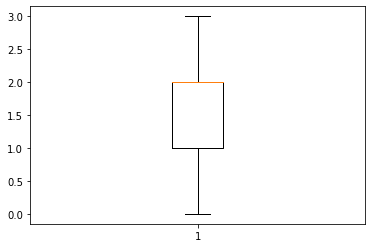

0.10   1.00
0.50   2.00
0.75   2.00
0.90   2.00
0.95   2.00
0.97   2.00
0.98   3.00
0.99   3.00
1.00   3.00
Name: FullBath, dtype: float64
HalfBath


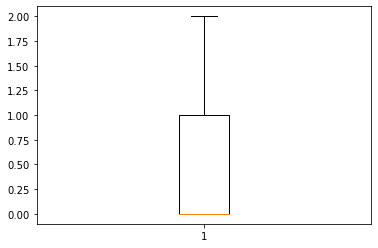

0.10   0.00
0.50   0.00
0.75   1.00
0.90   1.00
0.95   1.00
0.97   1.00
0.98   1.00
0.99   1.00
1.00   2.00
Name: HalfBath, dtype: float64
BedroomAbvGr


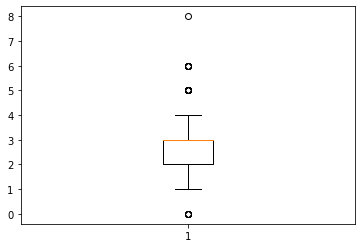

0.10   2.00
0.50   3.00
0.75   3.00
0.90   4.00
0.95   4.00
0.97   4.00
0.98   4.00
0.99   5.00
1.00   8.00
Name: BedroomAbvGr, dtype: float64
KitchenAbvGr


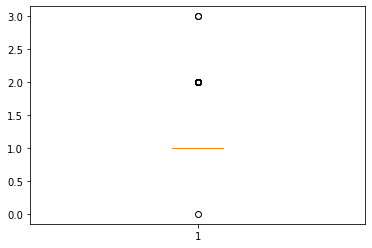

0.10   1.00
0.50   1.00
0.75   1.00
0.90   1.00
0.95   1.00
0.97   2.00
0.98   2.00
0.99   2.00
1.00   3.00
Name: KitchenAbvGr, dtype: float64
TotRmsAbvGrd


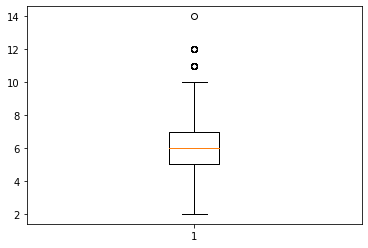

0.10    5.00
0.50    6.00
0.75    7.00
0.90    9.00
0.95   10.00
0.97   10.00
0.98   10.82
0.99   11.00
1.00   14.00
Name: TotRmsAbvGrd, dtype: float64
Fireplaces


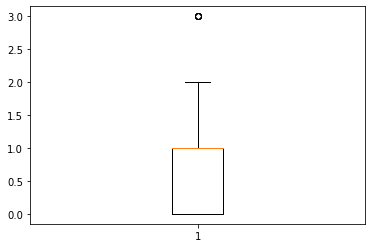

0.10   0.00
0.50   1.00
0.75   1.00
0.90   1.00
0.95   2.00
0.97   2.00
0.98   2.00
0.99   2.00
1.00   3.00
Name: Fireplaces, dtype: float64
GarageYrBlt


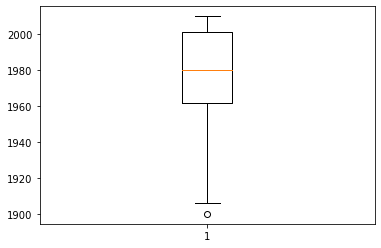

0.10   1948.00
0.50   1980.00
0.75   2001.00
0.90   2006.00
0.95   2007.00
0.97   2008.00
0.98   2008.00
0.99   2009.00
1.00   2010.00
Name: GarageYrBlt, dtype: float64
GarageCars


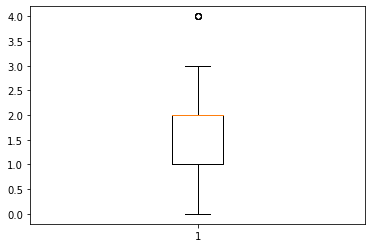

0.10   1.00
0.50   2.00
0.75   2.00
0.90   3.00
0.95   3.00
0.97   3.00
0.98   3.00
0.99   3.00
1.00   4.00
Name: GarageCars, dtype: float64
GarageArea


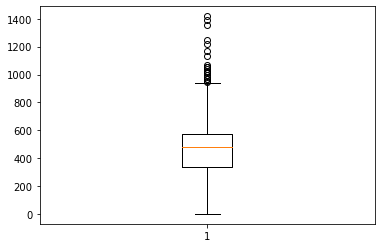

0.10    240.00
0.50    480.00
0.75    576.00
0.90    757.10
0.95    850.10
0.97    884.00
0.98    907.46
0.99   1002.79
1.00   1418.00
Name: GarageArea, dtype: float64
WoodDeckSF


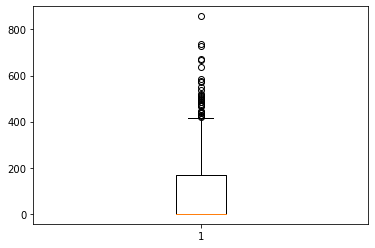

0.10     0.00
0.50     0.00
0.75   168.00
0.90   262.00
0.95   335.00
0.97   385.38
0.98   430.10
0.99   505.46
1.00   857.00
Name: WoodDeckSF, dtype: float64
OpenPorchSF


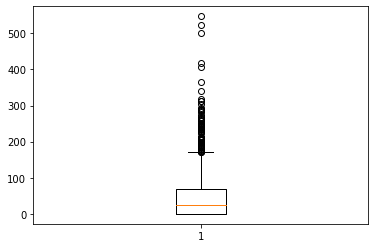

0.10     0.00
0.50    25.00
0.75    68.00
0.90   130.00
0.95   175.05
0.97   213.23
0.98   240.82
0.99   285.82
1.00   547.00
Name: OpenPorchSF, dtype: float64
EnclosedPorch


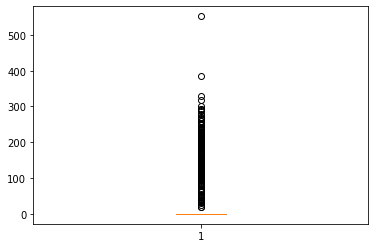

0.10     0.00
0.50     0.00
0.75     0.00
0.90   112.00
0.95   180.15
0.97   216.00
0.98   235.64
0.99   261.05
1.00   552.00
Name: EnclosedPorch, dtype: float64
3SsnPorch


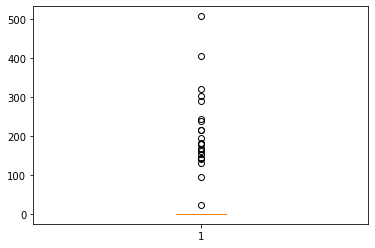

0.10     0.00
0.50     0.00
0.75     0.00
0.90     0.00
0.95     0.00
0.97     0.00
0.98     0.00
0.99   168.00
1.00   508.00
Name: 3SsnPorch, dtype: float64
ScreenPorch


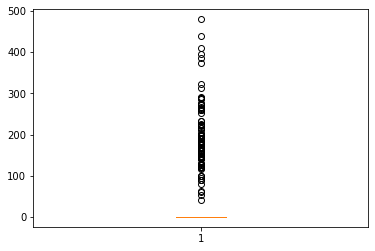

0.10     0.00
0.50     0.00
0.75     0.00
0.90     0.00
0.95   160.00
0.97   192.00
0.98   223.64
0.99   268.05
1.00   480.00
Name: ScreenPorch, dtype: float64
PoolArea


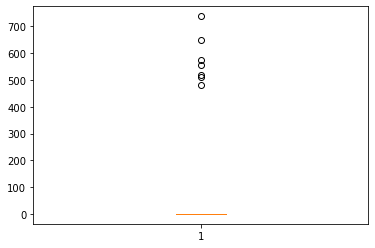

0.10     0.00
0.50     0.00
0.75     0.00
0.90     0.00
0.95     0.00
0.97     0.00
0.98     0.00
0.99     0.00
1.00   738.00
Name: PoolArea, dtype: float64
MiscVal


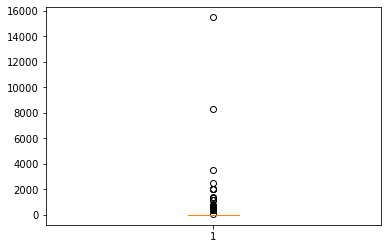

0.10       0.00
0.50       0.00
0.75       0.00
0.90       0.00
0.95       0.00
0.97     400.00
0.98     500.00
0.99     700.00
1.00   15500.00
Name: MiscVal, dtype: float64
MoSold


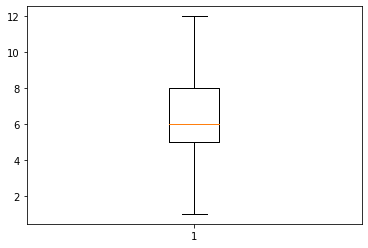

0.10    3.00
0.50    6.00
0.75    8.00
0.90   10.00
0.95   11.00
0.97   12.00
0.98   12.00
0.99   12.00
1.00   12.00
Name: MoSold, dtype: float64
YrSold


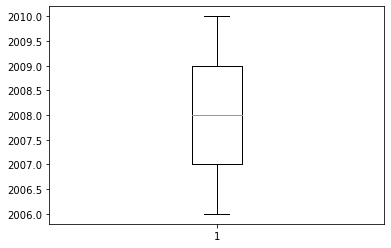

0.10   2006.00
0.50   2008.00
0.75   2009.00
0.90   2010.00
0.95   2010.00
0.97   2010.00
0.98   2010.00
0.99   2010.00
1.00   2010.00
Name: YrSold, dtype: float64
SalePrice


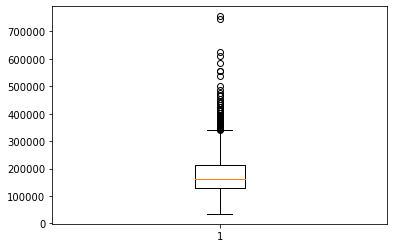

0.10   106475.00
0.50   163000.00
0.75   214000.00
0.90   278000.00
0.95   326100.00
0.97   374230.00
0.98   394931.06
0.99   442567.01
1.00   755000.00
Name: SalePrice, dtype: float64


In [28]:

#Create a box plot for numeric columns
for col in numeric_df:
    print(col)
    plt.boxplot(hou_df[col])
    plt.show()
    quantile =hou_df[col].quantile([0.1, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99, 1.0])
    print(quantile)

#### As number of rows are less, manually going through above boxplot and table and understand, which column has outliers. Below column has outliers.
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
TotalBsmtSF
1stFlrSF
GrLivArea
GarageArea
EnclosedPorch
MiscVal
SalePrice 

In [29]:
# will keep till 99 percentile

hou_df = hou_df[hou_df['LotArea'] <= hou_df['LotArea'].quantile(0.99)]
hou_df.describe(percentiles=[0.05, 0.10, .25,.5,.75,.90,.95,.99])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00,1445.00
mean,56.98,69.63,9776.59,6.09,5.57,1971.26,1984.80,101.76,434.25,45.27,569.09,1048.61,1154.90,345.31,5.91,1506.12,0.42,0.06,1.56,0.38,2.87,1.05,6.50,0.60,1978.64,1.76,471.04,92.07,46.11,22.15,3.44,14.95,2.46,43.11,6.32,2007.82,179844.11
std,42.30,21.02,4238.86,1.38,1.11,30.24,20.66,178.51,429.52,158.34,442.56,413.48,370.64,434.61,48.87,506.08,0.51,0.24,0.55,0.50,0.81,0.22,1.61,0.64,23.98,0.75,212.39,121.52,65.31,61.39,29.47,55.63,38.38,498.23,2.70,1.33,78495.85
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
5%,20.00,35.20,3247.20,4.00,4.00,1916.00,1950.00,0.00,0.00,0.00,0.00,508.80,672.20,0.00,0.00,848.00,0.00,0.00,1.00,0.00,2.00,1.00,4.00,0.00,1930.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2006.00,88000.00
10%,20.00,49.00,5000.00,5.00,5.00,1924.40,1950.00,0.00,0.00,0.00,75.00,632.40,756.00,0.00,0.00,912.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1948.00,1.00,240.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2006.00,106100.00
25%,20.00,60.00,7500.00,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,224.00,794.00,880.00,0.00,0.00,1126.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1962.00,1.00,326.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129900.00
50%,50.00,69.00,9430.00,6.00,5.00,1973.00,1994.00,0.00,379.00,0.00,481.00,990.00,1082.00,0.00,0.00,1456.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,478.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,162000.00
75%,70.00,79.00,11475.00,7.00,6.00,2000.00,2004.00,163.00,704.00,0.00,808.00,1281.00,1382.00,728.00,0.00,1768.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,213000.00
90%,120.00,92.00,14133.00,8.00,7.00,2006.00,2006.00,322.40,1054.80,107.20,1233.20,1593.60,1666.40,941.00,0.00,2151.40,1.00,0.00,2.00,1.00,4.00,1.00,9.00,1.00,2006.00,3.00,753.60,256.60,130.00,112.00,0.00,0.00,0.00,0.00,10.00,2010.00,275300.00


In [30]:

# will keep till 99 percentile

hou_df = hou_df[hou_df['GrLivArea'] <= hou_df['GrLivArea'].quantile(0.99)]
hou_df.describe(percentiles=[0.05, 0.10, .25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00,1430.00
mean,56.86,69.31,9694.50,6.07,5.57,1971.44,1984.70,99.59,431.08,45.29,565.69,1042.06,1146.84,334.63,4.32,1485.79,0.42,0.06,1.55,0.38,2.85,1.05,6.46,0.59,1978.61,1.76,469.24,91.05,45.97,21.79,3.48,14.82,1.73,43.56,6.33,2007.82,177456.05
std,42.35,20.60,4133.16,1.36,1.10,30.04,20.73,171.54,425.50,158.67,439.72,405.20,360.98,421.26,40.46,466.02,0.51,0.24,0.54,0.50,0.79,0.22,1.55,0.63,23.97,0.74,210.64,120.89,65.30,59.64,29.62,54.92,33.06,500.82,2.70,1.33,73096.87
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
5%,20.00,35.00,3230.00,4.00,4.00,1916.00,1950.00,0.00,0.00,0.00,0.00,504.90,672.00,0.00,0.00,848.00,0.00,0.00,1.00,0.00,2.00,1.00,4.00,0.00,1930.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2006.00,88000.00
10%,20.00,48.90,5000.00,5.00,5.00,1925.00,1950.00,0.00,0.00,0.00,73.80,630.00,756.00,0.00,0.00,909.70,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1948.00,1.00,240.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2006.00,106000.00
25%,20.00,60.00,7500.00,5.00,5.00,1954.00,1966.00,0.00,0.00,0.00,223.25,793.00,876.25,0.00,0.00,1125.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1962.00,1.00,325.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129500.00
50%,50.00,69.00,9375.00,6.00,5.00,1973.00,1993.00,0.00,378.00,0.00,475.00,984.50,1078.00,0.00,0.00,1454.50,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,476.50,0.00,24.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,161000.00
75%,70.00,78.00,11407.75,7.00,6.00,2001.00,2004.00,162.00,700.00,0.00,805.50,1271.75,1369.50,720.00,0.00,1755.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,66.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,210000.00
90%,120.00,91.00,14000.00,8.00,7.00,2006.00,2006.00,320.00,1040.00,106.20,1232.00,1581.10,1656.00,918.20,0.00,2112.10,1.00,0.00,2.00,1.00,4.00,1.00,8.00,1.00,2006.00,3.00,748.10,252.10,130.00,112.00,0.00,0.00,0.00,0.00,10.00,2010.00,274030.00


In [31]:
hou_df.shape
#around 1460-1415 = 45 records got removed.

(1430, 79)

In [32]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
29,EnclosedPorch,14.25
9,BsmtFinSF2,11.44
4,OverallCond,8.56
31,ScreenPorch,7.95
1,LotFrontage,7.26
0,MSSubClass,7.05
7,MasVnrArea,6.71
17,BsmtHalfBath,5.62
28,OpenPorchSF,5.27
2,LotArea,4.73


In [33]:
# checking corelation between variables
cor = hou_df.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,-0.35,0.04,-0.07,0.03,0.04,0.03,-0.07,-0.06,-0.15,-0.26,-0.27,0.31,0.02,0.07,0.01,-0.00,0.13,0.18,-0.04,0.28,0.03,-0.04,0.08,-0.04,-0.10,-0.02,-0.01,-0.01,-0.04,-0.03,0.00,-0.01,-0.01,-0.02,-0.09
LotFrontage,-0.39,1.00,0.52,0.21,-0.05,0.13,0.08,0.15,0.12,0.03,0.14,0.29,0.36,0.03,-0.03,0.30,0.06,-0.02,0.16,0.04,0.25,0.00,0.29,0.20,0.06,0.28,0.30,0.07,0.11,-0.01,0.07,0.05,0.02,0.00,0.03,0.02,0.34
LotArea,-0.35,0.52,1.00,0.15,-0.04,0.06,0.02,0.12,0.18,0.07,0.07,0.30,0.40,0.06,-0.04,0.36,0.10,0.04,0.16,0.08,0.26,-0.00,0.33,0.29,-0.00,0.27,0.31,0.16,0.14,-0.01,0.07,0.10,0.06,0.05,-0.01,-0.03,0.35
OverallQual,0.04,0.21,0.15,1.00,-0.10,0.59,0.55,0.39,0.21,-0.06,0.31,0.53,0.46,0.26,-0.07,0.59,0.10,-0.05,0.55,0.26,0.09,-0.19,0.41,0.39,0.52,0.59,0.55,0.22,0.30,-0.13,0.03,0.06,0.01,-0.03,0.08,-0.02,0.81
OverallCond,-0.07,-0.05,-0.04,-0.10,1.00,-0.37,0.07,-0.14,-0.03,0.04,-0.15,-0.18,-0.16,0.02,0.01,-0.11,-0.04,0.12,-0.22,-0.06,0.00,-0.09,-0.08,-0.03,-0.31,-0.20,-0.16,-0.01,-0.03,0.09,0.03,0.04,0.02,0.07,-0.00,0.05,-0.10
YearBuilt,0.03,0.13,0.06,0.59,-0.37,1.00,0.60,0.31,0.25,-0.05,0.16,0.41,0.30,0.02,-0.15,0.24,0.18,-0.04,0.50,0.24,-0.06,-0.17,0.12,0.16,0.78,0.55,0.49,0.23,0.19,-0.40,0.03,-0.04,0.00,-0.03,0.01,-0.02,0.58
YearRemodAdd,0.04,0.08,0.02,0.55,0.07,0.60,1.00,0.17,0.12,-0.07,0.18,0.29,0.24,0.13,-0.08,0.29,0.12,-0.02,0.44,0.18,-0.05,-0.15,0.18,0.11,0.62,0.42,0.37,0.21,0.22,-0.20,0.05,-0.04,-0.01,-0.01,0.03,0.04,0.54
MasVnrArea,0.03,0.15,0.12,0.39,-0.14,0.31,0.17,1.00,0.23,-0.07,0.11,0.33,0.31,0.13,-0.06,0.35,0.08,0.01,0.25,0.18,0.09,-0.03,0.26,0.24,0.24,0.35,0.36,0.14,0.10,-0.11,0.02,0.07,-0.01,-0.03,0.00,-0.01,0.46
BsmtFinSF1,-0.07,0.12,0.18,0.21,-0.03,0.25,0.12,0.23,1.00,-0.05,-0.53,0.45,0.38,-0.20,-0.07,0.11,0.66,0.07,0.03,-0.02,-0.13,-0.08,-0.01,0.23,0.15,0.22,0.26,0.17,0.07,-0.12,0.03,0.08,0.00,0.00,-0.00,0.02,0.39
BsmtFinSF2,-0.06,0.03,0.07,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,-0.21,0.11,0.10,-0.10,-0.00,-0.01,0.15,0.08,-0.08,-0.02,-0.01,-0.04,-0.04,0.03,-0.08,-0.04,-0.01,0.08,0.02,0.04,-0.03,0.10,0.05,0.01,-0.01,0.03,-0.02


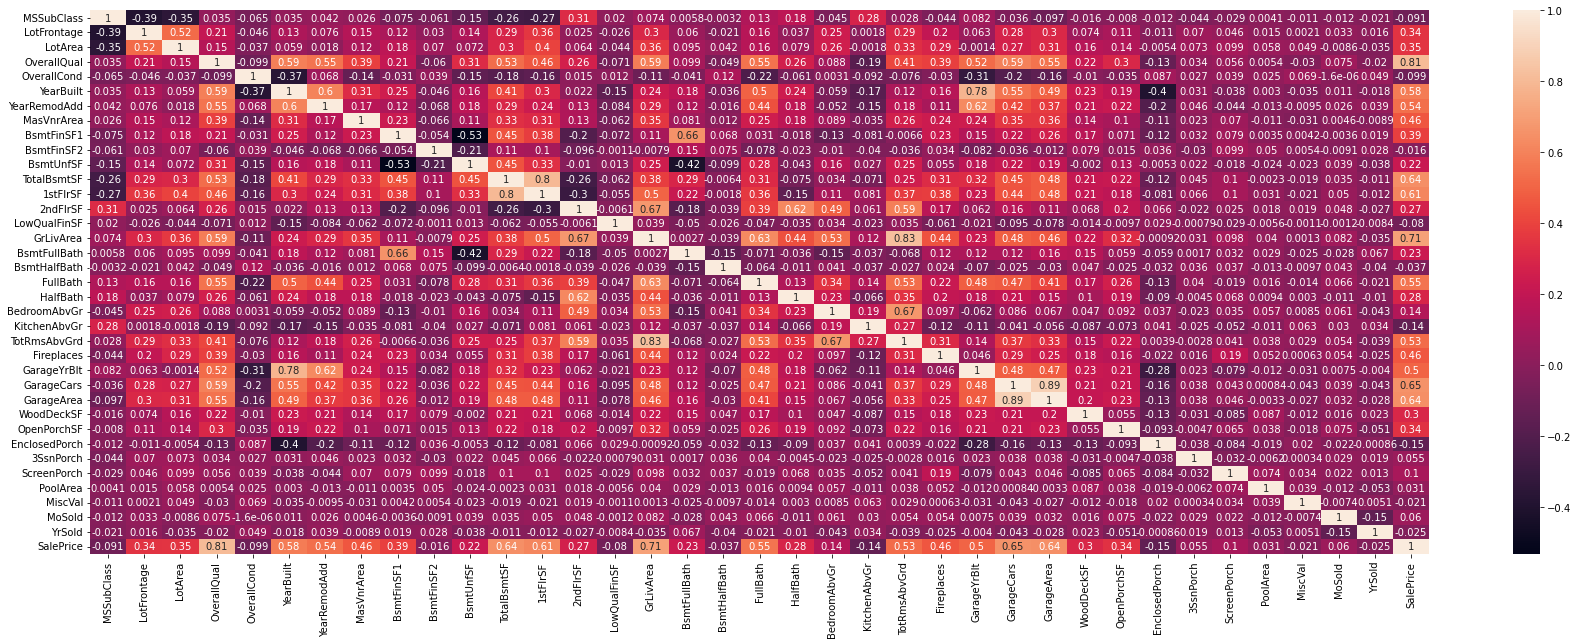

In [34]:
plt.figure(figsize = (30,10))
sns.heatmap(cor, annot=True)
plt.show()

##### Below variable has high corelation with sales price
OverallQual
GrLivArea
GarageCars
GarageArea
TotalBsmtSF
1stFlrSF
YearBuilt
FullBath
YearRemodAdd
TotRmsAbvGrd
GarageYrBlt
MasVnrArea
Fireplaces


### Dummies - One hot Encoding

In [35]:

## Below attributes are numerical. However considering this as categrorical as per data dictionary
cat_in_numeric = ['OverallQual',"OverallCond", 'BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath',  'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars' ]
for col in cat_in_numeric:
    hou_df[col] = hou_df[col].astype(str)

In [36]:
### Encoding categorical variables - Create dummies
dummy_df = pd.get_dummies(hou_df[hou_cat_manual], drop_first=True)

In [37]:
dummy_df.shape

(1430, 269)

In [38]:
for c in dummy_df:
    print(c)


MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_No_Alley
Alley_Pave
PoolQC_Gd
PoolQC_No_PoolQC
OverallCond_2
OverallCond_3
OverallCond_4
OverallCond_5
OverallCond_6
OverallCond_7
OverallCond_8
OverallCond_9
Fence_GdWo
Fence_MnPrv
Fence_MnWw
Fence_No_Fence
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
Condition1_Feedr
Condition1_Norm
Con

In [39]:
# Adding the dummy variables to the original dataframe
hou_df = pd.concat([hou_df,dummy_df],axis=1)
hou_df.shape


(1430, 348)

In [40]:
# Dropping the redundant columns
hou_df = hou_df.drop(hou_cat_manual,axis=1)
hou_df.shape

(1430, 295)

In [41]:
for c in hou_df:
    print(c)

MSSubClass
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_No_Alley
Alley_Pave
PoolQC_Gd
PoolQC_No_PoolQC
OverallCond_2
OverallCond_3
OverallCond_4
OverallCond_5
OverallCond_6
OverallCond_7
OverallCond_8
OverallCond_9
Fence_GdWo
Fence_MnPrv
Fence_MnWw
Fence_No_Fence
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborho

In [42]:
hou_df.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,PoolQC_Gd,PoolQC_No_PoolQC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_FireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_GarageType,GarageFinish_No_GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No_GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,2003,2003,196.00,706,0,150,856,856,854,0,1710,2003.00,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.00,9600,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,1976.00,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.00,11250,2001,2002,162.00,486,0,434,920,920,866,0,1786,2001.00,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.00,9550,1915,1970,0.00,216,0,540,756,961,756,0,1717,1998.00,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.00,14260,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,2000.00,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Splitting the data into train and test data sets

In [43]:
#Split the data into train and test
y = hou_df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [44]:
X = hou_df
X.shape

(1430, 294)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [46]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (1144, 294)
X_test shape (286, 294)
y_train shape (1144,)
y_test shape (286,)


In [47]:
numeric_hou_df = hou_df.select_dtypes(include=['int64','float64'])
numeric_hou_col_names = numeric_hou_df.columns
numeric_hou_col_names

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [48]:
#Scaling using MinMax
scaler = MinMaxScaler()
X_train[numeric_hou_df.columns] = scaler.fit_transform(X_train[numeric_hou_df.columns])
X_test[numeric_hou_col_names] = scaler.transform(X_test[numeric_hou_col_names])

In [49]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,PoolQC_Gd,PoolQC_No_PoolQC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_FireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_GarageType,GarageFinish_No_GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No_GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
475,0.00,0.20,0.21,0.64,0.22,0.00,0.33,0.00,0.15,0.30,0.28,0.00,0.00,0.24,0.87,0.45,0.00,0.04,0.00,0.00,0.40,0.00,0.00,0.55,0.25,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
967,0.00,0.16,0.18,0.58,0.08,0.09,0.47,0.00,0.08,0.34,0.33,0.00,0.00,0.29,0.50,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.55,0.50,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1314,0.00,0.13,0.20,0.57,0.07,0.00,0.38,0.00,0.09,0.30,0.27,0.00,0.00,0.23,0.51,0.20,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.82,0.25,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
462,0.00,0.13,0.21,0.65,0.25,0.00,0.29,0.21,0.00,0.27,0.23,0.00,0.00,0.20,0.59,0.26,0.00,0.00,0.72,0.00,0.00,0.00,0.00,1.00,0.75,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
226,0.24,0.21,0.26,0.88,0.75,0.18,0.30,0.00,0.27,0.38,0.38,0.85,0.00,0.83,0.86,0.52,0.35,0.21,0.00,0.00,0.00,0.00,0.00,0.45,0.25,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [50]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,PoolQC_Gd,PoolQC_No_PoolQC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_FireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_GarageType,GarageFinish_No_GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No_GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
58,0.24,0.15,0.37,0.97,0.93,0.64,0.00,0.00,0.60,0.44,0.47,0.99,0.00,0.99,0.96,0.46,0.30,0.00,0.11,0.00,0.00,0.00,0.00,0.82,0.00,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1146,0.00,0.16,0.29,0.81,0.58,0.05,0.66,0.00,0.02,0.40,0.42,0.00,0.00,0.36,0.77,0.29,0.26,0.05,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
379,0.24,0.13,0.20,0.92,0.83,0.01,0.00,0.00,0.42,0.31,0.29,0.51,0.00,0.55,0.91,0.33,0.16,0.12,0.00,0.00,0.00,0.00,0.00,0.45,0.75,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
991,0.29,0.34,0.48,0.02,0.60,0.00,0.11,0.00,0.30,0.29,0.25,0.54,0.00,0.53,0.23,0.31,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.91,0.75,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1060,0.59,0.07,0.11,0.93,0.85,0.00,0.32,0.00,0.31,0.42,0.44,0.00,0.00,0.38,0.92,0.42,0.00,0.00,0.52,0.00,0.00,0.00,0.00,0.27,1.00,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [51]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,PoolQC_Gd,PoolQC_No_PoolQC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_FireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_GarageType,GarageFinish_No_GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No_GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,...,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00,1144.00
mean,0.22,0.17,0.25,0.70,0.58,0.06,0.23,0.03,0.24,0.33,0.35,0.22,0.01,0.43,0.71,0.34,0.14,0.09,0.06,0.01,0.03,0.00,0.00,0.48,0.46,0.05,0.01,0.78,0.15,1.00,0.94,0.03,0.00,1.00,0.00,0.02,0.04,0.56,0.17,0.14,0.05,0.01,0.04,0.11,0.01,0.81,0.02,0.01,0.65,0.03,...,0.02,0.01,0.00,0.93,0.46,0.07,0.00,0.02,0.27,0.47,0.01,0.21,0.59,0.01,0.06,0.01,0.27,0.05,0.05,0.30,0.42,0.26,0.57,0.12,0.00,0.03,0.01,0.05,0.00,0.90,0.02,0.01,0.05,0.01,0.91,0.02,0.92,0.00,0.00,0.01,0.00,0.00,0.08,0.00,0.87,0.00,0.01,0.01,0.82,0.08
std,0.25,0.07,0.12,0.23,0.35,0.11,0.22,0.11,0.19,0.13,0.15,0.27,0.08,0.18,0.22,0.15,0.19,0.12,0.18,0.06,0.12,0.04,0.04,0.25,0.33,0.21,0.10,0.41,0.36,0.06,0.24,0.16,0.04,0.05,0.07,0.13,0.19,0.50,0.38,0.35,0.22,0.12,0.19,0.31,0.09,0.40,0.15,0.07,0.48,0.16,...,0.15,0.10,0.03,0.25,0.50,0.26,0.04,0.15,0.44,0.50,0.12,0.41,0.49,0.11,0.24,0.09,0.44,0.22,0.22,0.46,0.49,0.44,0.50,0.32,0.04,0.18,0.10,0.22,0.05,0.30,0.15,0.08,0.22,0.08,0.29,0.13,0.27,0.06,0.04,0.08,0.06,0.07,0.27,0.04,0.34,0.04,0.09,0.12,0.39,0.27
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.13,0.18,0.57,0.27,0.00,0.00,0.00,0.10,0.25,0.24,0.00,0.00,0.30,0.56,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.25,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,

In [52]:
X_test.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,PoolQC_Gd,PoolQC_No_PoolQC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_FireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_GarageType,GarageFinish_No_GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No_GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,...,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00,286.00
mean,0.20,0.17,0.25,0.70,0.59,0.06,0.22,0.02,0.25,0.32,0.36,0.22,0.01,0.44,0.72,0.34,0.15,0.08,0.07,0.00,0.03,0.00,0.00,0.49,0.45,0.04,0.01,0.79,0.15,1.00,0.94,0.03,0.00,1.00,0.00,0.02,0.05,0.58,0.17,0.13,0.04,0.01,0.04,0.11,0.01,0.81,0.02,0.01,0.62,0.06,...,0.02,0.01,0.00,0.93,0.41,0.06,0.01,0.02,0.22,0.52,0.01,0.22,0.61,0.01,0.06,0.00,0.26,0.06,0.06,0.27,0.41,0.27,0.54,0.12,0.01,0.03,0.01,0.06,0.00,0.90,0.03,0.01,0.06,0.00,0.90,0.04,0.90,0.00,0.00,0.01,0.00,0.00,0.10,0.00,0.86,0.01,0.00,0.01,0.84,0.10
std,0.24,0.07,0.13,0.24,0.35,0.10,0.24,0.08,0.19,0.13,0.17,0.28,0.07,0.18,0.22,0.16,0.20,0.10,0.20,0.03,0.11,0.05,0.02,0.25,0.33,0.19,0.12,0.41,0.36,0.06,0.24,0.17,0.00,0.06,0.00,0.13,0.21,0.49,0.37,0.34,0.20,0.10,0.19,0.32,0.08,0.39,0.15,0.08,0.49,0.23,...,0.15,0.08,0.00,0.25,0.49,0.24,0.08,0.14,0.42,0.50,0.10,0.41,0.49,0.08,0.23,0.00,0.44,0.24,0.24,0.44,0.49,0.44,0.50,0.32,0.10,0.17,0.10,0.24,0.00,0.31,0.18,0.08,0.24,0.00,0.31,0.19,0.30,0.00,0.00,0.08,0.06,0.00,0.30,0.06,0.35,0.08,0.06,0.10,0.37,0.31
min,0.00,0.00,0.01,-0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.13,0.18,0.57,0.30,0.00,0.00,0.00,0.09,0.25,0.23,0.00,0.00,0.31,0.57,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.25,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

#### Model Building and Evaluation

In [53]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 162),
 ('LotFrontage', False, 52),
 ('LotArea', False, 45),
 ('YearBuilt', False, 40),
 ('YearRemodAdd', False, 189),
 ('MasVnrArea', False, 62),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 11),
 ('GrLivArea', False, 10),
 ('GarageYrBlt', False, 110),
 ('GarageArea', False, 57),
 ('WoodDeckSF', False, 142),
 ('OpenPorchSF', False, 114),
 ('EnclosedPorch', False, 136),
 ('3SsnPorch', False, 93),
 ('ScreenPorch', False, 91),
 ('PoolArea', True, 1),
 ('MiscVal', False, 68),
 ('MoSold', False, 208),
 ('YrSold', False, 209),
 ('MSZoning_FV', False, 111),
 ('MSZoning_RH', False, 116),
 ('MSZoning_RL', False, 117),
 ('MSZoning_RM', False, 118),
 ('Street_Pave', False, 58),
 ('Alley_No_Alley', False, 210),
 ('Alley_Pave', False, 234),
 ('PoolQC_Gd', False, 55),
 ('PoolQC_No_PoolQC', True, 1),
 ('OverallCond_2', False, 37),
 ('OverallCond_3'

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'PoolArea', 'PoolQC_No_PoolQC', 'OverallQual_10',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_8', 'OverallQual_9', 'Exterior1st_CBlock',
       'BsmtCond_No_BsmtCond', 'BsmtCond_Po', 'Heating_GasW', 'Heating_OthW',
       'Electrical_Mix', 'TotRmsAbvGrd_2', 'Functional_Sev', 'GarageCars_3'],
      dtype='object')

In [56]:
lm1=lm.fit(X_train, y_train)
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

4764282209543278.0
[ 7.45692629e+03  1.08548948e+04  3.36364101e+04  4.80348774e+04
  3.32746950e+03  1.41171554e+04 -1.46982024e+15 -1.13787554e+15
 -1.80330887e+15  2.47491791e+15  5.31921315e+15  3.56310929e+15
  1.22163747e+15 -6.11744218e+15  4.81232812e+03  1.52288125e+04
  6.74443457e+03  9.95869531e+03  5.12325000e+03  2.14897852e+04
  1.91573281e+04  3.45202065e+05  1.02918672e+04 -2.18769141e+03
 -2.21706250e+03  3.58369531e+04  2.38373496e+04  2.05394688e+04
  1.50001875e+04  3.67036562e+04 -2.62136719e+03 -2.10261328e+03
  1.35475927e+05  3.74618760e+05  3.23650142e+14  3.23650142e+14
  3.23650142e+14  3.23650142e+14  3.23650142e+14  3.23650142e+14
  3.23650142e+14  3.23650142e+14  1.57548047e+03  5.16762500e+03
 -2.14662500e+03  2.29243750e+03  1.91134375e+03 -2.04069141e+03
  4.28093750e+02 -6.64979688e+03 -1.76420703e+04 -7.74500000e+02
 -1.57861016e+04  4.68512500e+03 -8.88585156e+03 -1.51155977e+04
 -1.22137500e+03  7.81682812e+03 -1.61822637e+04  7.49205859e+03
  5.16

In [57]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr : " , r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr : ",r2_test_lr)
metric.append( r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr : ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr : ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr : ",mse_train_lr)
metric.append( mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr : ", mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr :  0.8646912015918036
r2_test_lr :  0.8369784687668769
rss1_lr :  817021945930.0269
rss2_lr :  260371976880.63925
mse_train_lr :  714180022.6661074
mse_test_lr :  910391527.5546827


### Ridge and Lasso Regression

In [58]:
#lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)


Ridge()

In [59]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [60]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("Number of non-zero Coefficients {}".format(np.sum(lasso.coef_!=0)))
y_pred_train = lasso.predict(X_train)
print("lasso Train")
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso.predict(X_test)
print("lasso test")
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 282
lasso Train
MSE Test 241118271.33946356
MAE Score Test 10717.437175191775
R2 Score Test 0.9543176474645563 

lasso test
MSE Test 739723149.0491501
MAE Score Test 16423.033620750626
R2 Score Test 0.8675396279549219 



(739723149.0491501, 16423.033620750626, 0.8675396279549219)

In [61]:
print("Number of non-zero Coefficients {}".format(np.sum(ridge.coef_!=0)))
y_pred_train = ridge.predict(X_train)
print("Ridge Train")
get_error_stats(y_train,y_pred_train)

y_pred_test = ridge.predict(X_test)
print("Ridge Test")
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 292
Ridge Train
MSE Test 260134440.0496234
MAE Score Test 11119.804746637517
R2 Score Test 0.9507148374491015 

Ridge Test
MSE Test 608822829.1677696
MAE Score Test 15172.888774375626
R2 Score Test 0.8909796204637347 



(608822829.1677696, 15172.888774375626, 0.8909796204637347)

In [62]:
# R2 scores are similar for ridge and lasso

In [63]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(X_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = ridge.predict(X_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

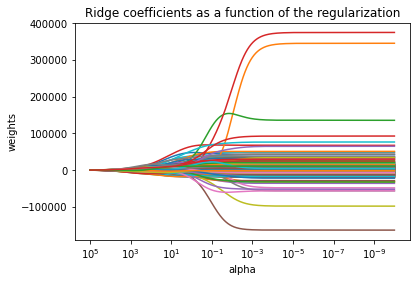

In [64]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [65]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

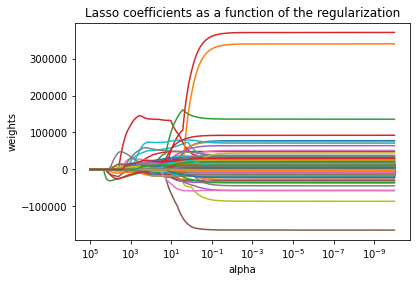

In [66]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [71]:
# list of alphas to tune
n_alphas
params = {'alpha': np.logspace(-2, 0.001, 100)}

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01      , 0.0104764 , 0.0109755 , 0.01149837, 0.01204616,
       0.01262004, 0.01322126, 0.01385112, 0.01451099, 0.01520229,
       0.01592653, 0.01668527, 0.01748016, 0.01831292, 0.01918535,
       0.02009934, 0.02105688, 0.02206003, 0.02311097, 0.02421198,
       0.02536544, 0.02657385, 0.02783984, 0.02916613, 0.03055561,
       0.03201128, 0.0335363...
       0.25992526, 0.27230813, 0.28528092, 0.29887174, 0.31311002,
       0.32802662, 0.34365385, 0.36002556, 0.37717722, 0.39514599,
       0.41397079, 0.43369241, 0.45435356, 0.47599902, 0.49867567,
       0.52243264, 0.54732139, 0.57339585, 0.6007125 , 0.62933051,
       0.65931189, 0.69072159, 0.72362765, 0.75810135, 0.79421739,
       0.832054  , 0.87169316, 0.91322072, 0.95672667, 1.00230524])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:

print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1.0023052380778996}
-16163.159385190398


In [74]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.40,0.02,0.01,0.00,0.01,{'alpha': 0.01},-17582.88,-18869.99,-15098.27,-15685.43,-15666.26,-16580.57,1419.90,100,-9931.27,-10247.99,-10467.98,-10478.94,-10246.07,-10274.45,199.27
1,0.41,0.03,0.01,0.00,0.01,{'alpha': 0.010476401189762107},-17582.55,-18869.07,-15098.16,-15685.03,-15666.42,-16580.25,1419.61,99,-9931.28,-10248.02,-10467.98,-10478.94,-10246.08,-10274.46,199.27
2,0.39,0.04,0.01,0.00,0.01,{'alpha': 0.010975498188884894},-17582.21,-18868.18,-15098.00,-15684.61,-15666.59,-16579.92,1419.33,98,-9931.29,-10248.06,-10467.98,-10478.94,-10246.08,-10274.47,199.27
3,0.40,0.02,0.01,0.00,0.01,{'alpha': 0.011498372228426555},-17581.85,-18867.24,-15097.86,-15684.18,-15666.77,-16579.58,1419.04,97,-9931.30,-10248.09,-10467.98,-10478.94,-10246.09,-10274.48,199.26
4,0.40,0.02,0.01,0.00,0.01,{'alpha': 0.01204615604942156},-17581.47,-18866.21,-15097.72,-15683.72,-15666.95,-16579.21,1418.72,96,-9931.31,-10248.13,-10467.99,-10478.94,-10246.10,-10274.49,199.26


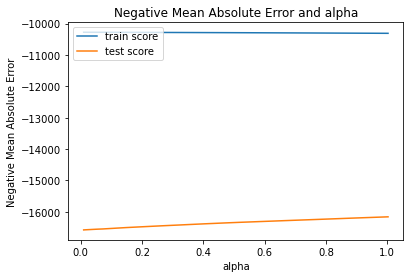

In [75]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [76]:
alpha = 1.0
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso()

In [78]:

MSE_train_Lasso=[]
MSE_test_Lasso=[]

y_pred_train = lasso.predict(X_train)
MSE_train_Lasso.append(mean_squared_error(y_train,y_pred_train))

y_pred_test = lasso.predict(X_test)
MSE_test_Lasso.append(mean_squared_error(y_test,y_pred_test))

residual = y_test - y_pred_test
  
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9543176474645563
0.8675396279549219
275839302412.3463
211560820628.05695
241118271.33946356
739723149.0491501


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

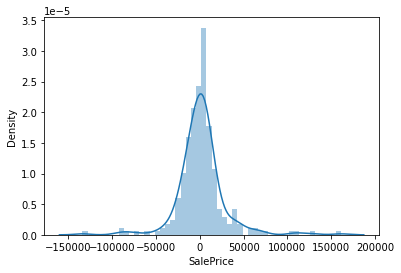

In [79]:
sns.distplot(residual)

In [87]:
print(metric3)

[0.9543176474645563, 0.8675396279549219, 275839302412.3463, 211560820628.05695, 15527.983492374777, 27197.851919759218]


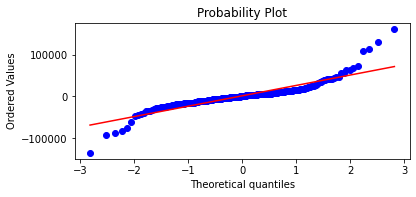

In [80]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

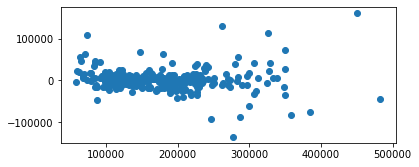

In [82]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, residual)

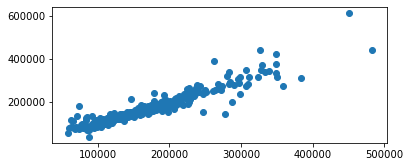

In [83]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, y_test)

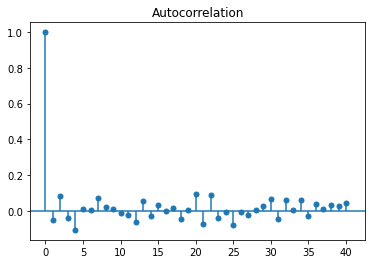

In [84]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=1)
acf.show()

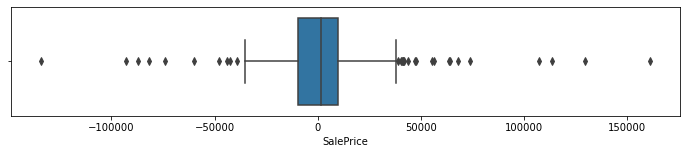

In [85]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

In [88]:
# list of alphas to tune
n_alphas
params = {'alpha': np.logspace(-2, 0.001, 100)}

# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01      , 0.0104764 , 0.0109755 , 0.01149837, 0.01204616,
       0.01262004, 0.01322126, 0.01385112, 0.01451099, 0.01520229,
       0.01592653, 0.01668527, 0.01748016, 0.01831292, 0.01918535,
       0.02009934, 0.02105688, 0.02206003, 0.02311097, 0.02421198,
       0.02536544, 0.02657385, 0.02783984, 0.02916613, 0.03055561,
       0.03201128, 0.0335363...
       0.25992526, 0.27230813, 0.28528092, 0.29887174, 0.31311002,
       0.32802662, 0.34365385, 0.36002556, 0.37717722, 0.39514599,
       0.41397079, 0.43369241, 0.45435356, 0.47599902, 0.49867567,
       0.52243264, 0.54732139, 0.57339585, 0.6007125 , 0.62933051,
       0.65931189, 0.69072159, 0.72362765, 0.75810135, 0.79421739,
       0.832054  , 0.87169316, 0.91322072, 0.95672667, 1.00230524])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)


{'alpha': 1.0023052380778996}
-15068.298253105773


In [90]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.03,0.00,0.01,0.00,0.01,{'alpha': 0.01},-17557.32,-18280.27,-14952.42,-15545.30,-15666.56,-16400.37,1283.64,100,-9946.56,-10277.39,-10514.56,-10520.01,-10254.85,-10302.68,210.65
1,0.03,0.00,0.01,0.00,0.01,{'alpha': 0.010476401189762107},-17554.72,-18271.16,-14946.57,-15538.55,-15659.51,-16394.10,1283.54,99,-9947.38,-10278.54,-10516.43,-10521.49,-10255.24,-10303.82,211.01
2,0.03,0.00,0.01,0.00,0.01,{'alpha': 0.010975498188884894},-17552.06,-18261.86,-14940.56,-15531.65,-15652.37,-16387.70,1283.43,98,-9948.24,-10279.71,-10518.36,-10522.99,-10255.65,-10304.99,211.38
3,0.03,0.00,0.01,0.00,0.01,{'alpha': 0.011498372228426555},-17549.33,-18252.39,-14934.40,-15524.53,-15645.00,-16381.13,1283.35,97,-9949.12,-10280.93,-10520.54,-10524.50,-10256.06,-10306.23,211.78
4,0.03,0.00,0.01,0.00,0.01,{'alpha': 0.01204615604942156},-17546.49,-18242.73,-14928.08,-15517.17,-15637.39,-16374.37,1283.30,96,-9950.03,-10282.17,-10522.76,-10526.14,-10256.49,-10307.52,212.21


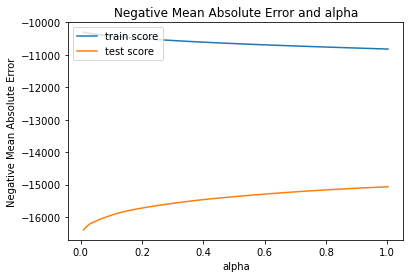

In [91]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [96]:
MSE_train_Ridge=[]
MSE_test_Ridge=[]
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
MSE_train_Ridge.append(r2_score(y_train,y_pred_train))
y_pred_test = ridge.predict(X_test)
MSE_test_Ridge.append(r2_score(y_test,y_pred_test))

residual = y_test - y_pred_test
  

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)
  

0.9507148374491015
0.8909796204637347
297593799416.76917
174123329141.9821
260134440.0496234
608822829.1677696


In [97]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.86,0.95,0.95
1,R2 Score (Test),0.84,0.89,0.87
2,RSS (Train),817021945930.03,297593799416.77,275839302412.35
3,RSS (Test),260371976880.64,174123329141.98,211560820628.06
4,MSE (Train),26724.15,16128.68,15527.98
5,MSE (Test),30172.70,24674.34,27197.85


### Model Evaluation

In [98]:
ridge_pred = ridge.predict(X_test)

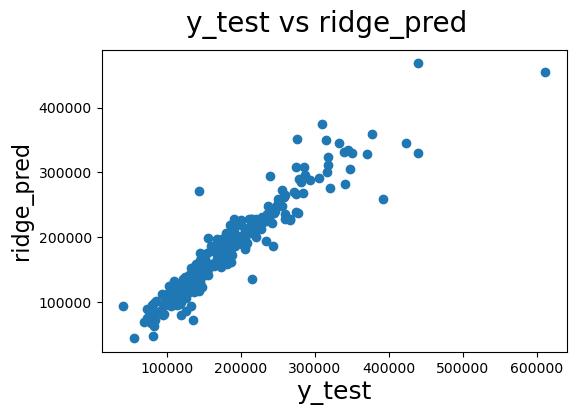

In [99]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

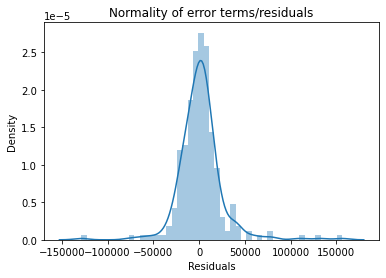

In [100]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [101]:
lasso_pred = lasso.predict(X_test)

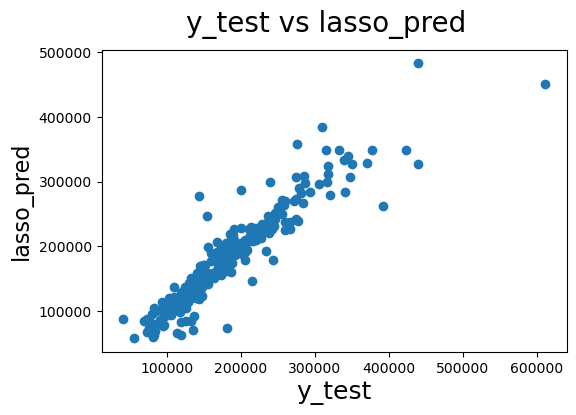

In [102]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

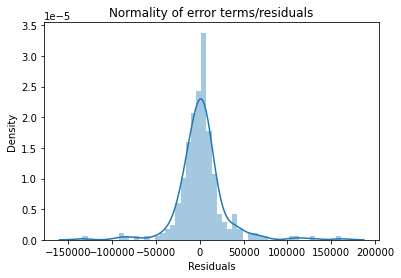

In [103]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [104]:
### coefficients after regularization

In [105]:
betas = pd.DataFrame(index=X_train.columns)

In [106]:
betas.rows = X_train.columns

In [107]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [108]:
print(ridge.coef_)
print(lasso.coef_)

[-6.23589392e+03  1.02827662e+04  2.55612961e+04  3.72689354e+04
  4.36777863e+03  1.40601607e+04  3.61773776e+04  1.37578398e+04
  1.49710344e+04  3.87190016e+04  4.77621995e+04  3.90316714e+04
  1.49714014e+03  6.45629957e+04  2.09375181e+03  1.52870927e+04
  8.02147071e+03  1.27648597e+04  4.10303531e+03  1.62152056e+04
  1.57396013e+04  5.76373523e+03 -2.01353707e+03 -2.31420229e+03
 -1.42748061e+03  2.30796096e+04  1.44054689e+04  1.11408024e+04
  6.92774701e+03  2.47591132e+04 -1.79860726e+03 -3.32552879e+02
  3.37227525e+04  5.97661350e+03 -9.00692293e+02 -1.75854407e+04
 -9.68244162e+03 -2.71339003e+03  4.20571251e+02  8.21388222e+03
  1.33238871e+04  1.86325381e+04  8.73145214e+02  3.62367669e+03
 -1.34165923e+03  1.50764858e+03 -5.93064766e+01  1.94251925e+02
  5.25783328e+02 -3.16471801e+03 -1.45839915e+04  1.15684322e+03
 -7.38282222e+03  6.39428812e+03 -8.06371569e+03 -1.06265039e+04
 -1.12842063e+03  3.95132000e+03 -6.64174816e+03  1.75181962e+02
  2.30071348e+03  3.74945

In [109]:
print(betas["Ridge"])


MSSubClass              -6235.89
LotFrontage             10282.77
LotArea                 25561.30
YearBuilt               37268.94
YearRemodAdd             4367.78
                          ...   
SaleCondition_AdjLand   12705.21
SaleCondition_Alloca    -2168.10
SaleCondition_Family    -1376.54
SaleCondition_Normal    10558.95
SaleCondition_Partial   18631.72
Name: Ridge, Length: 294, dtype: float64


In [110]:
print(betas["Lasso"])

MSSubClass                2916.51
LotFrontage              10258.58
LotArea                  33223.67
YearBuilt                48527.99
YearRemodAdd              3239.83
                           ...   
SaleCondition_AdjLand    25199.03
SaleCondition_Alloca    -17648.81
SaleCondition_Family     -1974.59
SaleCondition_Normal     10732.84
SaleCondition_Partial    28240.76
Name: Lasso, Length: 294, dtype: float64


In [111]:
pd.set_option('display.max_rows', None)
#betas.head(100)
betas.sort_values("Lasso", ascending=False)

,Ridge,Lasso
PoolQC_No_PoolQC,5976.61,265758.78
PoolArea,5763.74,204059.96
PoolQC_Gd,33722.75,145977.63
TotRmsAbvGrd_12,26357.91,87421.99
OverallQual_10,52719.97,79352.47
2ndFlrSF,39031.67,64513.77
1stFlrSF,47762.20,64348.80
TotalBsmtSF,38719.00,60337.31
BsmtFullBath_3,15761.85,57460.03
YearBuilt,37268.94,48527.99


The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### Q1-Which variables are significant in predicting the price of a house?
Answer- The below mentioned variables are significant in predicting the price

GrLivArea: Above grade (ground) living area square feet<br>
OverallQual -OverallQual :  Especially very excellent and excellent<br>
TotalBsmtSF - Total square feet of basement area<br>
YearBuilt -  Original construction date<br>
BsmtFinSF1: Type 1 finished square feet<br>
Neighborhood: Physical locations within Ames city limits especially crawford, StoneBr
SaleCondition: Condition of sale
GarageArea: Size of garage in square feet
Kitchen: Kitchens above grade
LotArea: Lot size in square feet


In [112]:
### How well those variables describe the price of a house.?
final_metric



,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.86,0.95,0.95
1,R2 Score (Test),0.84,0.89,0.87
2,RSS (Train),817021945930.03,297593799416.77,275839302412.35
3,RSS (Test),260371976880.64,174123329141.98,211560820628.06
4,MSE (Train),26724.15,16128.68,15527.98
5,MSE (Test),30172.70,24674.34,27197.85


Lasso regression has been chosen as R2 score of train is 0.94 and test = 0.90.
R2 is proportion of the variance in the dependent variable that is predictable from the independent variable(s)

90% of the changeability of the dependent output attribute can be explained by the model while the remaining 10 % of the variability is still unaccounted for.
These independent variable can predict 90%.

In [113]:

betas.sort_values("Lasso", ascending=False)

,Ridge,Lasso
PoolQC_No_PoolQC,5976.61,265758.78
PoolArea,5763.74,204059.96
PoolQC_Gd,33722.75,145977.63
TotRmsAbvGrd_12,26357.91,87421.99
OverallQual_10,52719.97,79352.47
2ndFlrSF,39031.67,64513.77
1stFlrSF,47762.20,64348.80
TotalBsmtSF,38719.00,60337.31
BsmtFullBath_3,15761.85,57460.03
YearBuilt,37268.94,48527.99
